## Pythonで構造方程式モデリング (SEM) 〜semopyのチュートリアルを試してみる〜

url : https://qiita.com/roki18d/items/6d923d4319e2048885fa

Pythonで構造方程式モデリング (SEM) 〜semopyのチュートリアルを試してみる〜

構造方程式モデリング (SEM) をPythonでやりたいと思った時に、使用するパッケージとして semopy が候補に上がるかと思いますが、公式チュートリアルが何をやっているのか少し分かりにくく感じたので、動かしつつ解説をつけてみました。

url: https://semopy.com/tutorial.html

## 構造方程式モデリング (SEM) とは

構造方程式モデリング (SEM : Structural Equation Modeling) とは、変数間の関係性に関する仮説をモデル化し、その妥当性を検証するための統計的手法です。「共分散構造分析」などとも呼ばれます。

## ■ SEMの特徴

SEMの特徴として以下のようなものが挙げられます。

仮定した変数間の関係性を統計的に検証できる。
潜在変数 (構成概念) を導入した分析ができる。
パス図を用いたビジュアル表現ができる。
回帰分析・因子分析など、下位モデルに様々な統計モデルを含む。
関係性の「探索」ではなく、「検証」に主眼を置いている。

## ■ 分析の流れ
実際の分析では、以下のようなPDCAサイクルを回すことになると思います。

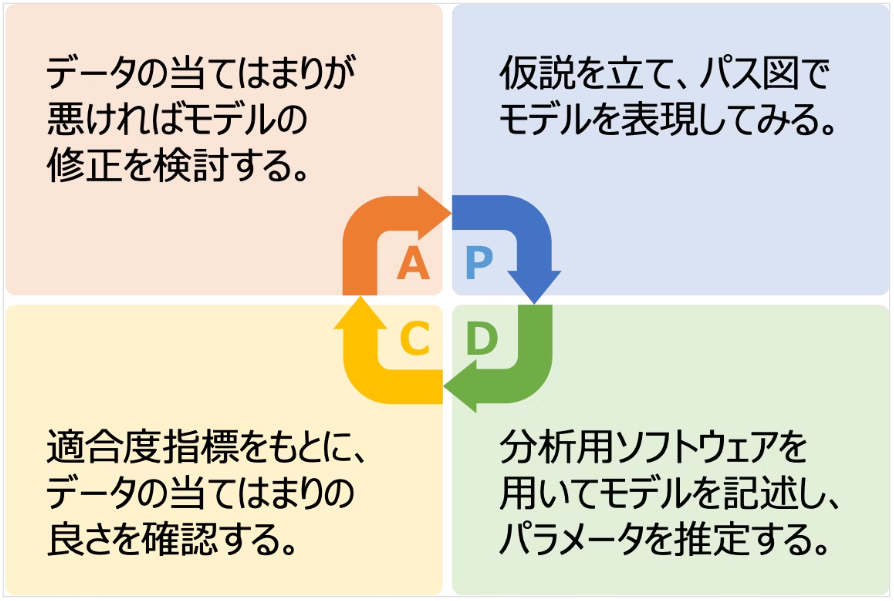

## ■ SEMにおける重要な概念・用語

観測変数と潜在変数

    「観測変数」 :
直接観測される変数

例: テストの点数、身長 etc.

    「潜在変数」 :
直接は観測されない共通の要因に関する変数
因子分析でいうところの「因子」に相当。SEMでは「構成概念」と呼ばれる。

例: 数学の能力、ブランド力 etc.

パス図では観測変数は四角形で、潜在変数は円形で表現されます。

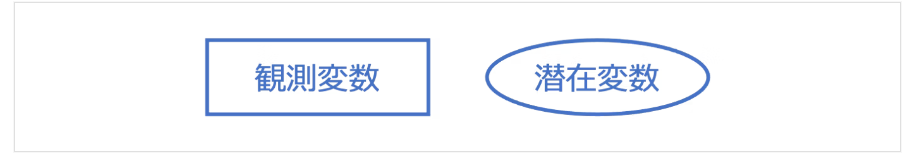

## 構造方程式と測定方程式

因子分析では説明変数と因子の関係性しか記述しませんが、SEMでは因子（構成概念）同士の関係性も記述することができます。これらの関係性の記述は、事前の研究結果などから導かれた仮説に基づきます。

    「構造方程式」 ... 仮説に基づいた因果関係を記述する方程式
    「測定方程式」 ... 潜在変数とそれを構成する観測変数の関係性を記述する方程式

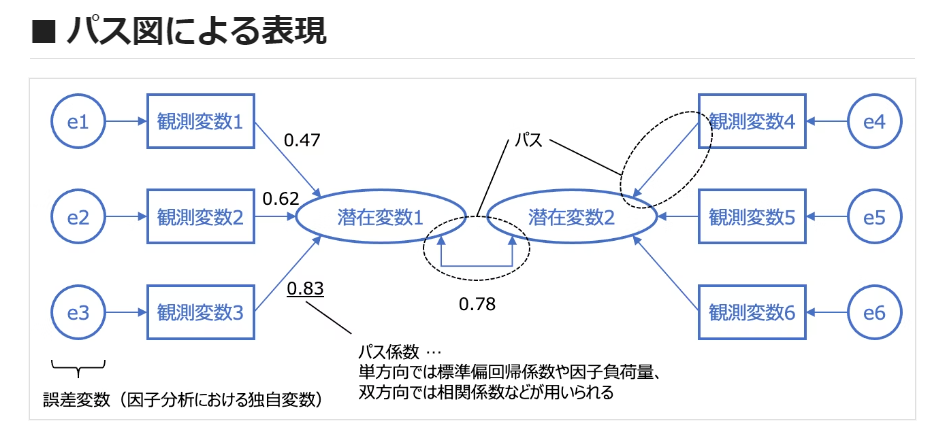

## semopyで構造方程式モデリング

pip install semopy で semopy パッケージをインストールできますが、Python3.7以外では正常に動作しない可能性があります。筆者は pyenv (python3.7.6) + jupyter-lab 環境で実行しています

In [1]:
pip install semopy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import semopy
from semopy import Model

## ■ 使用するデータセットについて

semopyがサンプルデータセットとして用意している "Political Democracy" を使用します。発展途上国における産業化と政治的民主主義に関するデータセットです。各変数の説明は以下の通りです。

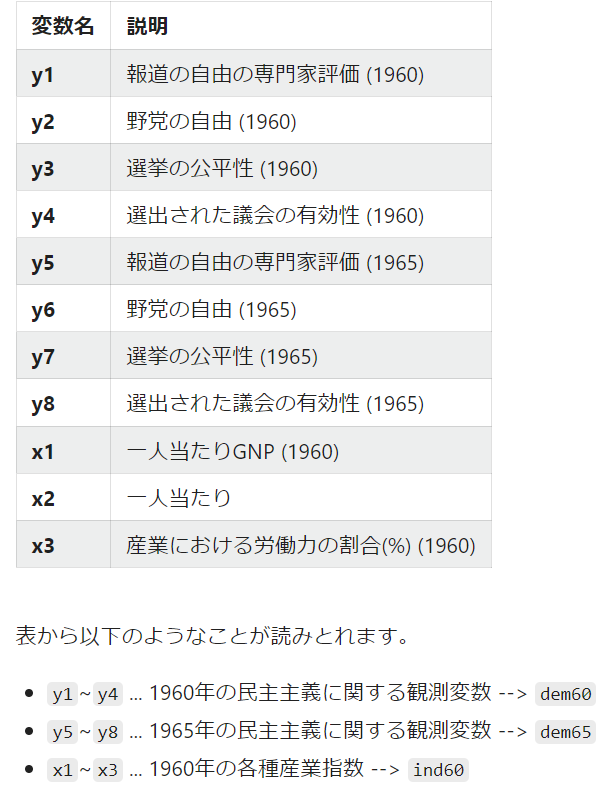

In [3]:
data = semopy.examples.political_democracy.get_data()
display(data.head())

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679


## 【Plan】 仮説を立て、モデルを記述する

semopyではモデルをstr型で記述します。サンプルデータセットに対応するモデル記述が既に用意されているので、今回はそちらを利用します。パラメータ推定の結果、モデルに対するデータの当てはまりが良くない場合には、このモデル記述を編集することになります。

In [4]:
desc = semopy.examples.political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


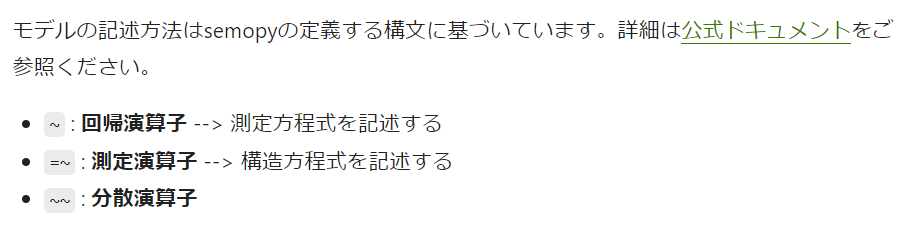

url: https://semopy.com/syntax.html

## 【Do】 モデルを定義し、パラメータを推定する

semopy.Model に引数としてモデル記述を指定し、モデルを定義します。fit() メソッドを呼び出してパラメータを推定します。

In [5]:
model = Model(desc)
result = model.fit(data)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 0.172 0.448 0.082 0.120 0.467 2.352 3.430 3.256


inspect() メソッドで、パラメータ推定結果を確認できます。

In [6]:
inspect = model.inspect()
display(inspect)

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,dem60,~,ind60,1.482379,0.399024,3.715017,0.000203
1,dem65,~,ind60,0.571912,0.221383,2.583364,0.009784
2,dem65,~,dem60,0.837574,0.098446,8.507992,0.0
3,x1,~,ind60,1.000000,-,-,-
4,x2,~,ind60,2.180494,0.138565,15.736254,0.0
5,x3,~,ind60,1.818546,0.151993,11.96465,0.0
6,y1,~,dem60,1.000000,-,-,-
7,y2,~,dem60,1.256819,0.182687,6.879647,0.0
8,y3,~,dem60,1.058174,0.151521,6.983699,0.0
9,y4,~,dem60,1.265186,0.145151,8.716344,0.0


適合後のモデルに対して、パス図を描画・保存することができます。(graphvizパッケージが必要になります)

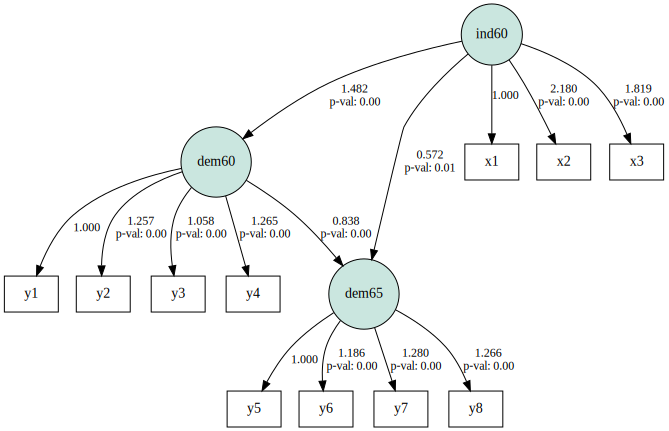

In [7]:
semopy.semplot(model, "graph.png")

## 【Check & Action】 データの当てはまりの良さを確認する
calc_stats メソッドにより、各種適合度指標を確認できます。指標をもとに当てはまりが良くないと判断した場合、モデルの修正を検討します。

In [8]:
stats = semopy.calc_stats(model)
display(stats.T)

,Value
DoF,35.000000
DoF Baseline,55.000000
chi2,38.125446
chi2 p-value,0.329171
chi2 Baseline,730.654577
CFI,0.995374
GFI,0.947820
AGFI,0.918003
NFI,0.947820
TLI,0.992731


以上です。

## 参考

    semopy: A Python package for Structural Equation Modeling
    url: https://arxiv.org/pdf/1905.09376

    PoliticalDemocracy: Industrialization And Political Democracy Dataset - rdrr.io
    url: https://rdrr.io/cran/lavaan/man/PoliticalDemocracy.html

    SEM(構造方程式モデリング)とは - (株)日科技研
    url: https://www.i-juse.co.jp/statistics/product/func/sem/sem.html

    構造方程式モデリングの話（初級編） - slideshare
    url:

    100614 構造方程式モデリング基本の「き」 - slideshare
    url: https://www.slideshare.net/slideshow/100614-4502873/4502873#43

    構造方程式モデリングの基礎 - 京都大学大学院 教育学研究科
    url: https://cogpsy.educ.kyoto-u.ac.jp/personal/Kusumi/datasem09/090708.pdf

    構造方程式モデリング ―モデル構築䛾再検討―
    url: https://www.mizumot.com/method/2012-05_Konno.pdf